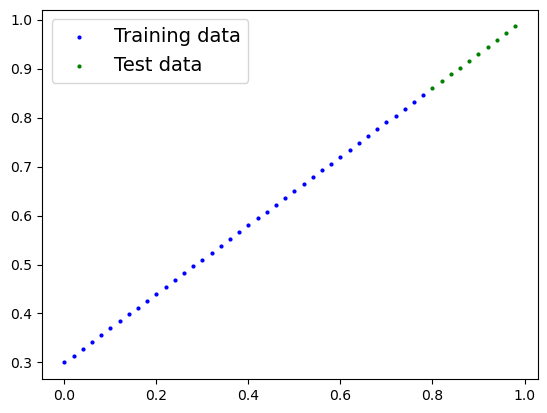

In [18]:
import torch
import matplotlib.pyplot as plt
from torch import nn

def plot_predictions( train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training data')
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Test data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'Prediction')

    plt.legend(prop = {'size': 14})
    

weight = 0.7
bias = 0.3

start  = 0 
end = 1
step = 0.02 
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*X + bias

#X[:10], y[:10]

#Creating train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]




plot_predictions()



In [19]:
#Build model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights* x + self.bias

In [20]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [21]:
# making some predictions 

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

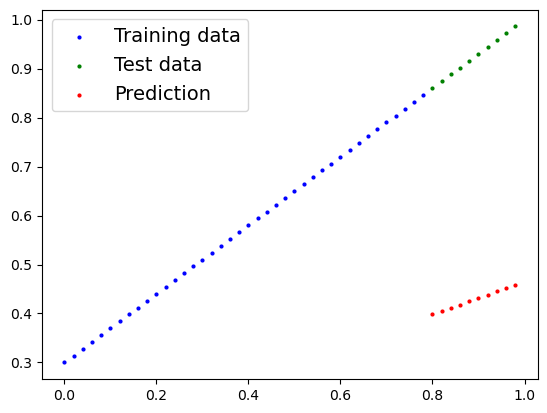

In [22]:
plot_predictions(predictions= y_preds)

In [23]:
#Train model

#loss function
loss_fn = nn.L1Loss()

#optimezer

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) #lr learning rate




In [24]:
#training and testing loop
torch.manual_seed(42)

epochs = 300

epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):
    model_0.train()
    #forward pass
    y_pred = model_0(X_train)
    
    #calculate loss
    loss = loss_fn(y_pred, y_train)
    #print(f'Loss {loss}')

    #optimezer zero grad
    optimizer.zero_grad()

    #backpropagation
    loss.backward()

    #step the optimizer
    optimizer.step()

    #Testing
    model_0.eval()
    with torch.inference_mode():
    #with torch.no_grad()
        test_pred = model_0(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

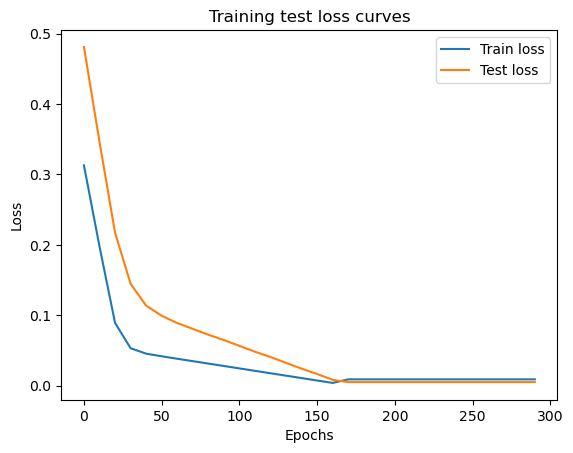

In [29]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train loss')
plt.plot(epoch_count, test_loss_values, label = 'Test loss')
plt.title('Training test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
with torch.inference_mode():
    y_pred_after_hundred = model_0(X_test)

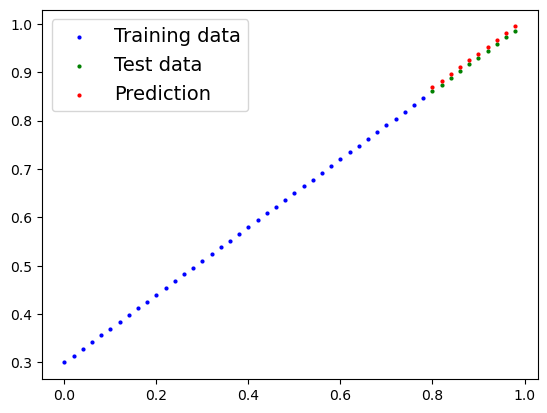

In [27]:
plot_predictions(predictions=y_pred_after_hundred)

In [31]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)


MODEL_NAME = '00_pytorch_create_1st_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)


Saving model to: models\00_pytorch_create_1st_model.pth
